In [ ]:
## )).Pytorh Fundamentals

In [ ]:
!nvidia-smi

Fri Aug 26 22:22:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(torch.__version__)

1.12.1+cu113


# Introduction to tensors
#### Creating Tensor
Tensor are way to represnet the numeric Data

In [ ]:
#scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
scalar.ndim

0

In [ ]:
# Get tensor back as python int
scalar.item()

7

In [ ]:
#vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [ ]:
vector.ndim

1

In [ ]:
vector.shape

torch.Size([2])

In [ ]:
#  Matrix
MATRIX = torch.tensor([[7,8],[9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX[1]

tensor([ 9, 10])

In [ ]:
MATRIX.shape

torch.Size([2, 2])

In [ ]:
# TENSORS
TENSOR = torch.tensor([[[1,2,3],[3,6,9],[2,4,5]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [ ]:
TENSOR.ndim

3

In [ ]:
TENSOR.shape

torch.Size([1, 3, 3])

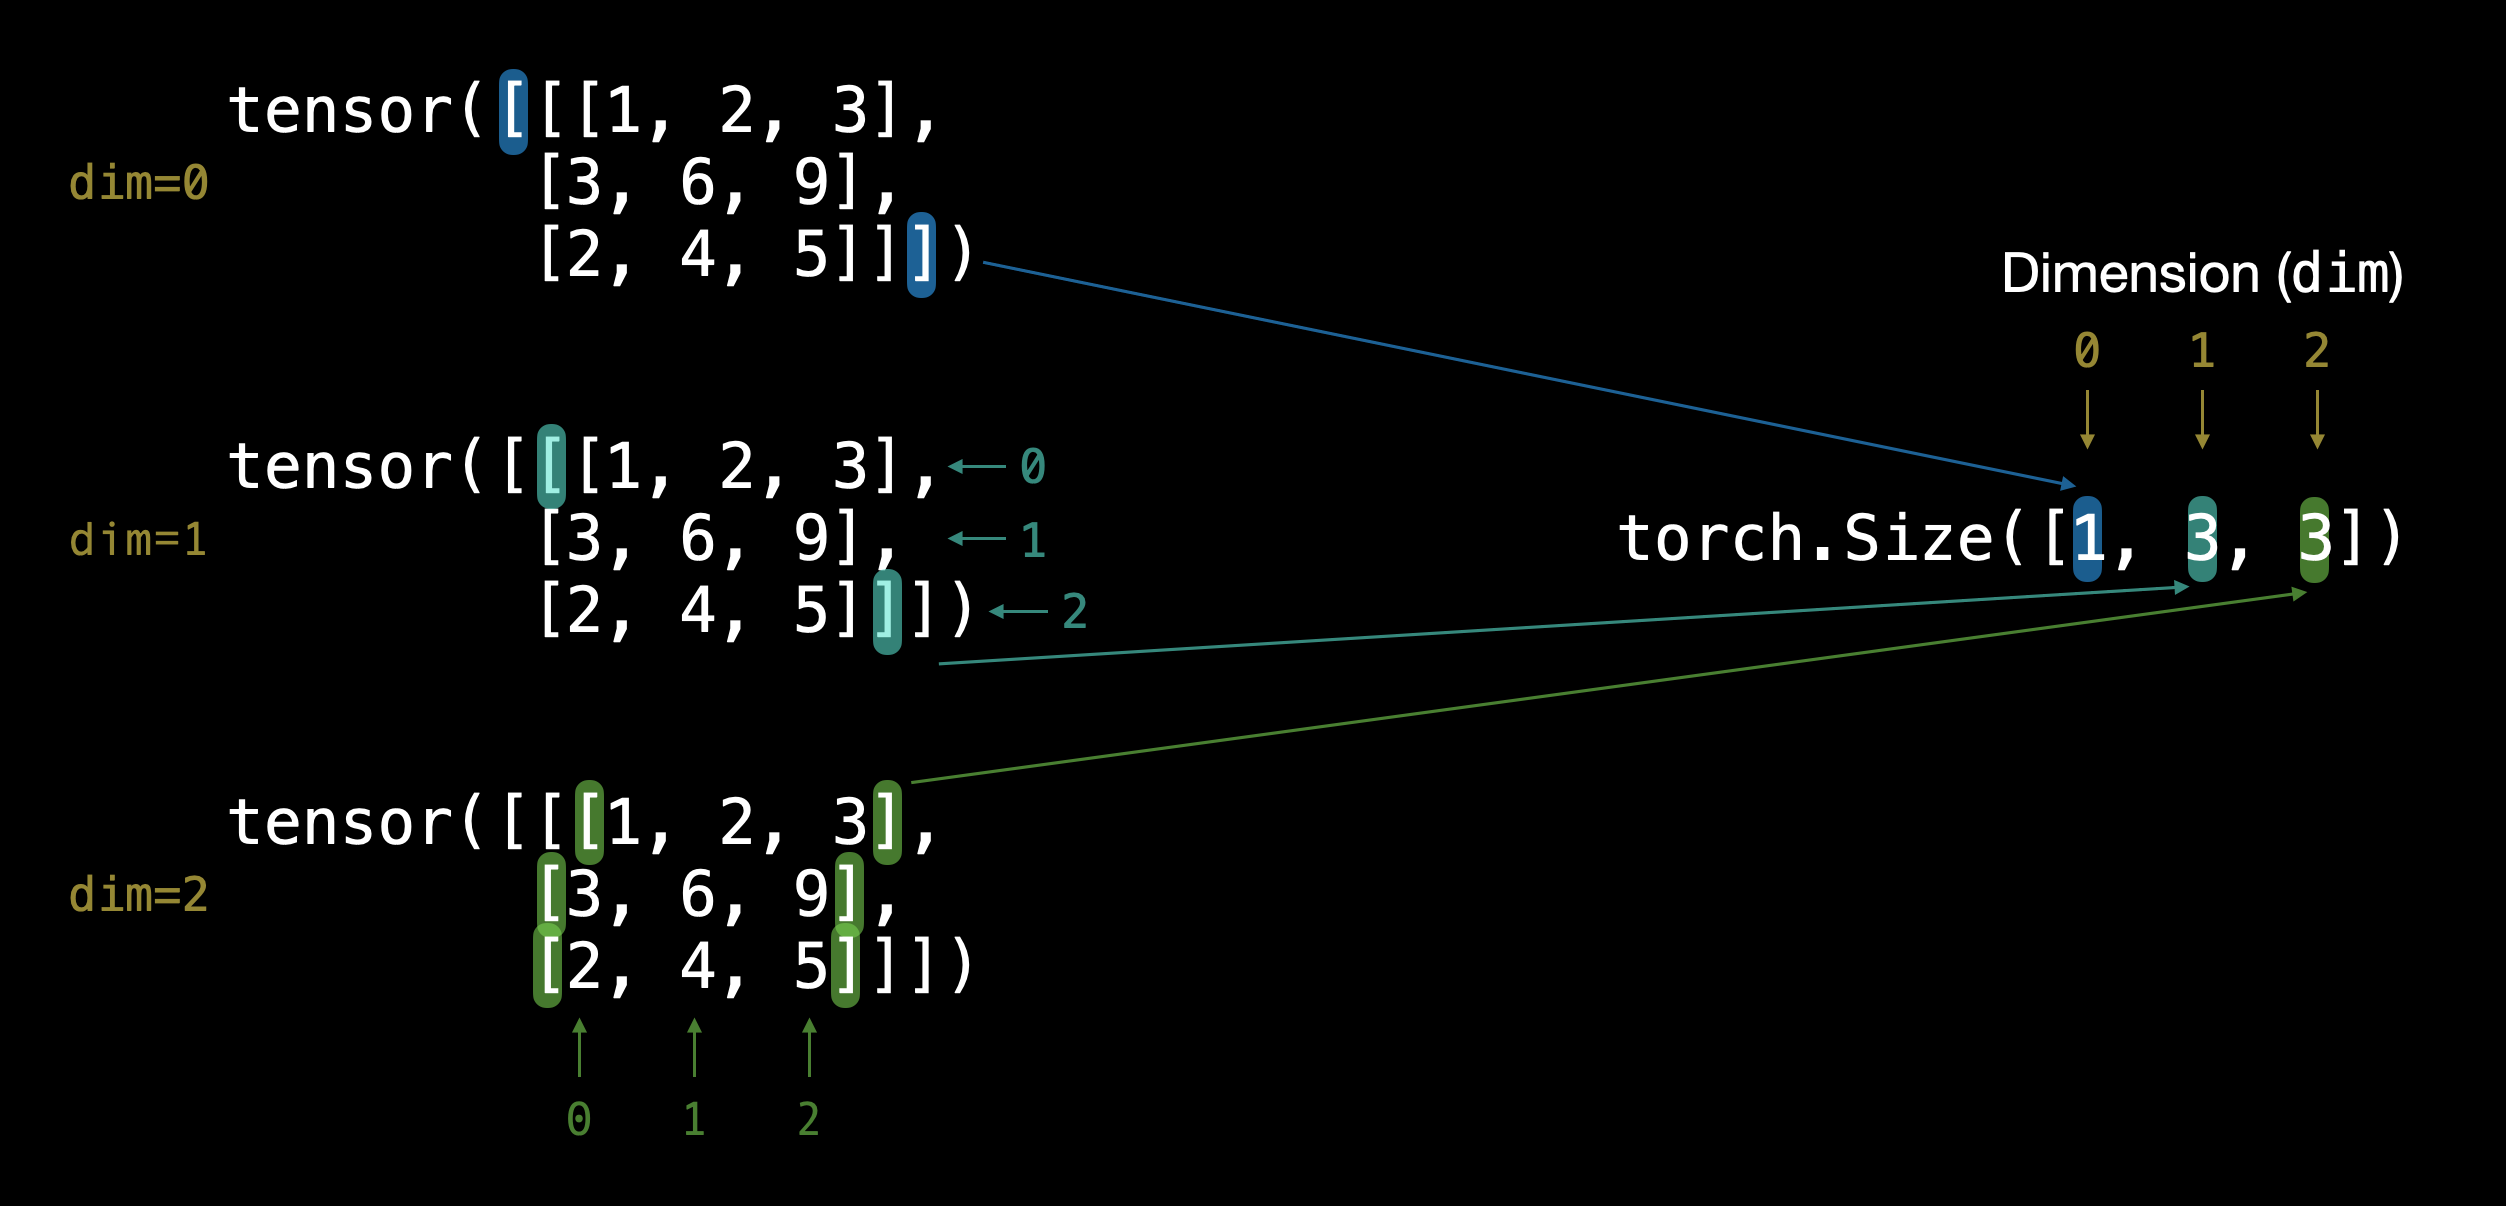

In [ ]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

### Random Tensors
Why random tensors?

Random tensors are important beacause the way neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better respresent the data.

`start with random numbers -> look at data-> update random numbers -> look at data -> update data`

Torch random tensors - https://pytorch.org/docs/stable/generated/torch.rand.html

In [ ]:
# create a random tensor of size
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.2801, 0.4721, 0.5375, 0.8460],
        [0.2527, 0.6463, 0.3933, 0.2907],
        [0.7018, 0.9036, 0.4928, 0.9662]])

In [ ]:
random_tensor.ndim

2

In [ ]:
# create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224,224,3))
random_image_size_tensor.shape,random_image_size_tensor.ndim


(torch.Size([224, 224, 3]), 3)

In [ ]:
torch.rand(3,3)

tensor([[0.3188, 0.2475, 0.9337],
        [0.2827, 0.1921, 0.2136],
        [0.9827, 0.1874, 0.3007]])

Zeros and Ones

# tensor datatypes
**Note** : tenosr dataypes is one of the 3 big errors we will run into with Pytorch & deep learning
1. tensors not right datatype
2.Tensors not right shape
3. Tensors not on the right device

In [ ]:
float_32_tensor = torch.tensor([3.0,6.0,9.0],
                               dtype = torch.float16 # what datatype is the tensor
                               ,device = None # what device is your tensor on
                               ,requires_grad = False) # whether or not to track gardients with tensors operations
float_32_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
float_32_tensor.dtype

torch.float16

In [ ]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
int_32_tensor = torch.tensor([3,6,9],dtype = torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

### Getting ifnormation from tensors(tensor attributes)
1. Tensor not right datatype-To do get `datatype` from a tensor,can use `tensor.dtype`
2. tensor not right shape-to get shape from a tensor, can use `tensor.shape`
3. Tensors not on the right device- to get device from a tensor, can use `tensor.device`
*Note* call with curly barces are funcation and without braces its attributes.

In [ ]:
#create a tensor
some_tensor = torch.rand(3,4)
some_tensor

tensor([[0.4795, 0.8195, 0.9498, 0.5738],
        [0.0396, 0.0066, 0.5579, 0.7675],
        [0.3861, 0.9149, 0.9309, 0.1990]])

In [ ]:
some_tensor.size()

torch.Size([3, 4])

In [ ]:
#find out details abaout some tensor
print(some_tensor)
print(f"datatype of tensor: {some_tensor.dtype}")
print(f"shape of tensor:{some_tensor.shape}")
print(f"device tensor is on:{some_tensor.device}")

tensor([[0.4795, 0.8195, 0.9498, 0.5738],
        [0.0396, 0.0066, 0.5579, 0.7675],
        [0.3861, 0.9149, 0.9309, 0.1990]])
datatype of tensor: torch.float32
shape of tensor:torch.Size([3, 4])
device tensor is on:cpu


### Manipluation Tensors(tensor Operations)
tensor operations include:
* Addition
* Subtarction
* Multiplication(element-wise)
* Divison
* Matrix Multiplication


In [ ]:
#create a tensor
tensor = torch.tensor([1,2,3])
tensor + 100.0

tensor([101., 102., 103.])

#Reshaping, stacking, squeezing and unseqeezing tensor
* Reshaping - reshapes an input tenosr to defined shape
* view - return a vieww of an input tensor of  ceratin shape but keep the same memory as the original tensor
* stacking - combine multiple tensors on top of each other (vstack) or  side by side(hastack)
* squeeze -removes all `1` dimension from a tensor
* unsqueeze -add a `1` dimension to a target tensor
* Permute -return a view of the input with dimesnion permuted(swapped) in a ceratin way.

In [ ]:
# Lets's create a tensor
import torch
x = torch.arange(1.,10.)
x,x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
# add an extra dimesnion
x_reshaped = x.reshape(1,9)
x_reshaped,x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
z = x.view(1,9)
z,z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
#changing z changes x(beacuse a view of tensor shares the same memory as the original elemebt)
z[:,0] =5
z,x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
#stack tensor on top of each other
x_stacked = torch.stack([x,x,x,x],dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
#torch.squeeze #remove all the single dimension form the tensor
print(f"previous tensor: {x_reshaped}")
print(f"previous shape:{x_reshaped.shape}")
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor:{x_squeezed}")
print(f"New shape:{x_squeezed.shape}")

previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
previous shape:torch.Size([1, 9])

New tensor:tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape:torch.Size([9])


In [ ]:
x_reshaped.squeeze()

tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
#torch.unsqueeze() - add a single dimension to a target tensor at a specific deim(dimension)
print(f"previo")

previo


`Torch.permute` rearannges the position fo the tensor

In [ ]:
x_original = torch.rand(size =(224,224,3)) # [height,width,colour_chanlles]

#permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2,0,1) #shidt axis 0->1,1->2,2->0
print(f"previosu shape: {x_original.shape}")
print(f" New shape: {x_permuted.shape}")#[colour_channels,height.width]

previosu shape: torch.Size([224, 224, 3])
 New shape: torch.Size([3, 224, 224])


In [ ]:
x_original[0,0,0] = 7272812
x_original[0,0,0],x_permuted[0,0,0]

(tensor(7272812.), tensor(7272812.))

# PyTorch tensor & Numpy

In [ ]:
import torch
import numpy as np

array = np.arange(1.0,8.0)

tensor = torch.from_numpy(array) # when converting from numpy-> pytorch reflects numpy's default datatype of float64 unless specified otehrvise
array,tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

Reproducibility(trying to tak random out of random)

In short how a neuarl network learns:
`start with random numbers -> tensor operations -> update random numbers to try and make them better representation of the data -> again -> again ->again..`

to reduce the randomness in neural network and PyTorch comes the conecpt of  **random seed**.

Essentially what the random seed does is "flavour" the randomness

In [ ]:
torch.rand(3,3)

tensor([[0.9855, 0.5122, 0.8823],
        [0.0982, 0.1436, 0.3469],
        [0.8105, 0.7088, 0.6727]])

In [ ]:
import torch

random_tensor_A =torch.rand(3,4)
random_tensor_B = torch.rand(3,4)
print(random_tensor_A == random_tensor_B)

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# Lets's make some ranodm but reproducible tensors
import torch

# set the random seed

RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)
torch.manual_seed(RANDOM_SEED)

random_tensor_D = torch.rand(3,4)

print(random_tensor_C==random_tensor_D)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running tensors and PyTorch objects on the GPUs(making the faster computations)

GPUs = faster computation on numbers, thanks to CUDA +NVIDIA hardware +PyTorch working behnidn the scene to working behinda these scenes to make everything hunky(good)


In [ ]:
### 1 .Getting a GPU

In [ ]:
!nvidia-smi

Fri Aug 26 22:22:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Check for GPU access with PyTorch


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
#setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
torch.cuda.device_count()

1

# Intoduction to Pytoch workflow
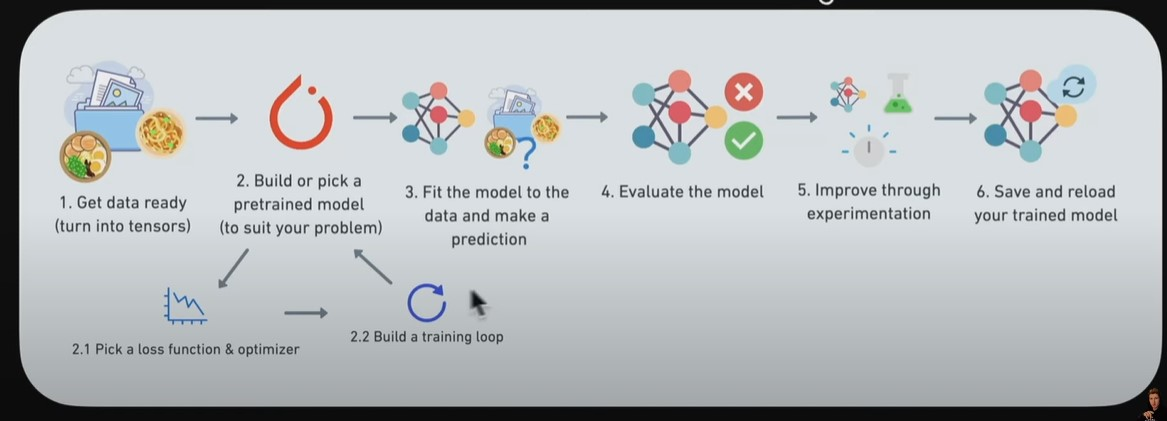